# Logistic Regression Model

## 1.Packages


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split

## 2. Problem Statement


Data were extracted
Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

## 3. DataSet
Loading the Dataset for the task

    a. We will use 'dataset' as a dataset for this task
    b. X is Input Features
    c. y is the Target Class

In [7]:
dataset = pd.read_csv('./data_banknote_authentication.txt',header=None)

In [8]:
print('Shape of dataset: ',dataset.shape)

Shape of dataset:  (1372, 5)


In [29]:
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
print('Shape of X: ',X.shape)
print('Shape of y:', y.shape)

print("Data type of X:", X.dtype)
print("Data type of y:", y.dtype)

Shape of X:  (1372, 4)
Shape of y: (1372,)
Data type of X: float64
Data type of y: int64


### 3.1 Train-Test Split

We split the X and y into train and test set, with ratio train:test at 70:30.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [13]:
print('Shape of X_train: ',X_train.shape)
print('Shape of y_train:', y_train.shape)

print("Data type of X_train:", X_train.dtype)
print("Data type of y_train:", y_train.dtype)

Shape of X_train:  (960, 4)
Shape of y_train: (960,)
Data type of X_train: float64
Data type of y_train: int64


In [14]:
print('Shape of X_test: ',X_test.shape)
print('Shape of y_test:', y_test.shape)

print("Data type of X_test:", X_train.dtype)
print("Data type of y_train:", y_train.dtype)

Shape of X_test:  (412, 4)
Shape of y_test: (412,)
Data type of X_test: float64
Data type of y_train: int64


Conclusion

- total no. training exmples: 1362
- training set: 960
- test set: 412
- no. of features: 4

## 4. Building the model

Logestic Regression model (Binary Classification) that makes use of logistic log cost funtion as cost function

### 4.1 Prediction Model

Logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Sigmoid drives the output to 0 or 1

In [15]:
def model(X,w,b):
    
    m = X.shape[0]
    y_pred = np.zeros((m,))
    z= np.dot(X,w)+b

    for i in range(m):
        y_pred[i] = 1/(1+math.exp(-z[i]))

    return y_pred

### 4.2 Cost Function

Logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

where
* m is the number of training examples in the dataset
* $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [16]:
def compute_cost(X,y,w,b):
    m,n = X.shape
    y_pred = model(X,w,b)
    sum_cost = 0.0

    for i in range(m):
        sum_cost += (y[i]*math.log(y_pred[i]))+((1-y[i])*math.log(1-y_pred[i]))
    
    cost = -(sum_cost)/m

    return cost

### 4.3 Computing Gradient Descent

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

First Computing $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ as:
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)}
$$

In [17]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    
    y_pred = model(X,w,b)
    cost = y_pred-y

    sum_cost_w = np.zeros((n,))
    sum_cost_b = 0.0

    for i in range(m):
        for j in range(n):
            sum_cost_w[j] += cost[i] * X[i,j]
        
        sum_cost_b += cost[i]
    
    dj_dw = sum_cost_w/m
    dj_db = sum_cost_b/m
    
    return dj_dw, dj_db

#### Applying Gradient Descent based on the Derivative and Cost

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$


In [21]:
def compute_descent(X,y,w,b,alpha,num_iterations):

    J_history = []
    w_history = []

    for i in range(num_iterations):
        dj_dw,dj_db = compute_gradient(X,y,w,b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

         # Save Cost J at each iteration
        if i < 100000: # prevent resource exhaustion
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
      
      # Printing Cost J at certain intervals
        if i%math.ceil(num_iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w,b, J_history, w_history


## 5. Passing values into the model and Expected outputs

In [22]:
m,n = X.shape
w_init = np.zeros((n,))
b_init = 0.0
alpha = 0.001
num_iterations = 10000
print("Initial Cost: ",compute_cost(X_train,y_train,w_init,b_init))
w,b,J_hist,_ = compute_descent(X_train,y_train,w_init,b_init,alpha,num_iterations)
print("After Cost: ",compute_cost(X,y,w,b))

Initial Cost:  0.693147180559934
Iteration    0: Cost     0.69
Iteration 1000: Cost     0.26
Iteration 2000: Cost     0.20
Iteration 3000: Cost     0.17
Iteration 4000: Cost     0.15
Iteration 5000: Cost     0.14
Iteration 6000: Cost     0.13
Iteration 7000: Cost     0.12
Iteration 8000: Cost     0.11
Iteration 9000: Cost     0.11
After Cost:  0.10302848212995355


### 5.1 Plotting Cost Vs Iteration

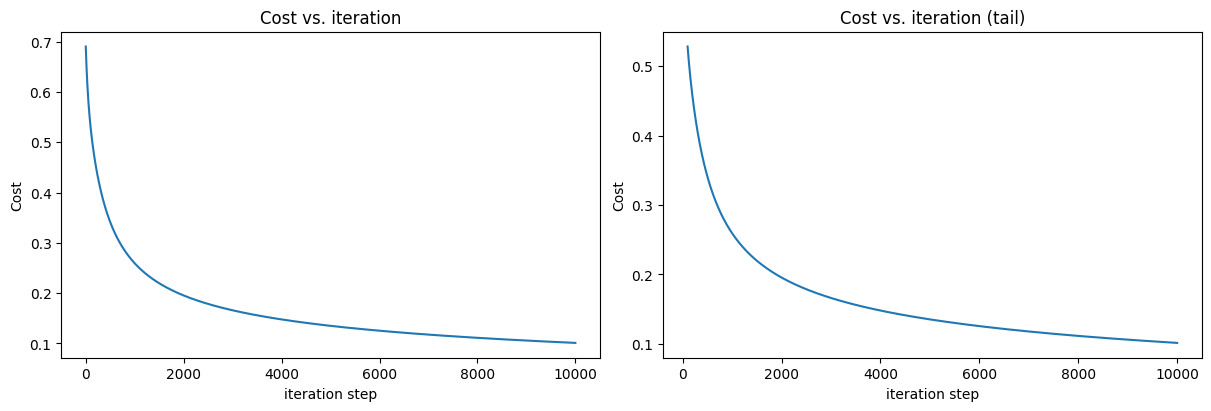

In [23]:
# plot cost versus iteration  
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## 6. Testing the model with test set

In [24]:
print('Shape of X: ',X_test.shape)
print('Shape of y:', y_test.shape)

print("Data type of X:", X_test.dtype)
print("Data type of y:", y_test.dtype)

Shape of X:  (412, 4)
Shape of y: (412,)
Data type of X: float64
Data type of y: int64


In [26]:
y_pred = model(X_test,w,b)

threshold = 0.5
y_pred_labels = (y_pred > threshold).astype(int)
print("Predicted Labels:", y_pred_labels)


Predicted Labels: [1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 0 0 0]


In [28]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model is: ",accuracy_score(y_test,y_pred_labels))

The accuracy of the model is:  0.9733009708737864
